# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [301]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import subprocess
import sys

# Try importing citipy and install it if not found
try:
    from citipy import citipy
except ImportError:
    print("citipy module not found. Installing citipy...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "citipy"])
    from citipy import citipy

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Your code logic here (e.g., use citipy, requests, etc.)

### Generate the Cities List by Using the `citipy` Library

In [58]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 582


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [303]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date      
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
City not found. Skipping...
Processing Record 2 of Set 1 | isafjordur
City not found. Skipping...
Processing Record 3 of Set 1 | adamstown
City not found. Skipping...
Processing Record 4 of Set 1 | jimenez
City not found. Skipping...
Processing Record 5 of Set 1 | gizo
City not found. Skipping...
Processing Record 6 of Set 1 | edinburgh of the seven seas
City not found. Skipping...
Processing Record 7 of Set 1 | archangelos
City not found. Skipping...
Processing Record 8 of Set 1 | chibougamau
City not found. Skipping...
Processing Record 9 of Set 1 | punta arenas
City not found. Skipping...
Processing Record 10 of Set 1 | enewetak
City not found. Skipping...
Processing Record 11 of Set 1 | tyukhtet
City not found. Skipping...
Processing Record 12 of Set 1 | carnarvon
City not found. Skipping...
Processing Record 13 of Set 1 | tiksi
City not found. Skipping...
Processing Record 14 of Set

In [304]:
import pandas as pd

# Example city data (ensure this is populated with your actual data)
city_data = [
    {"City": "New York", "Temperature": 22, "Humidity": 60},
    {"City": "Los Angeles", "Temperature": 25, "Humidity": 50},
    {"City": "Chicago", "Temperature": 20, "Humidity": 70}
]

# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
record_count = city_data_df.count()
print("Record Count for Each Column:")
print(record_count)
print("\n")  # Add a newline for better separation

# Display the DataFrame
print("City Weather Data:")
print(city_data_df)

Record Count for Each Column:
City           3
Temperature    3
Humidity       3
dtype: int64


City Weather Data:
          City  Temperature  Humidity
0     New York           22        60
1  Los Angeles           25        50
2      Chicago           20        70


In [111]:
# Display sample data
city_data_df.head()

,City,Temperature,Humidity
0,New York,22,60
1,Los Angeles,25,50
2,Chicago,20,70


In [312]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [313]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Temperature,Humidity
City_ID,,,
0,New York,22,60
1,Los Angeles,25,50
2,Chicago,20,70


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

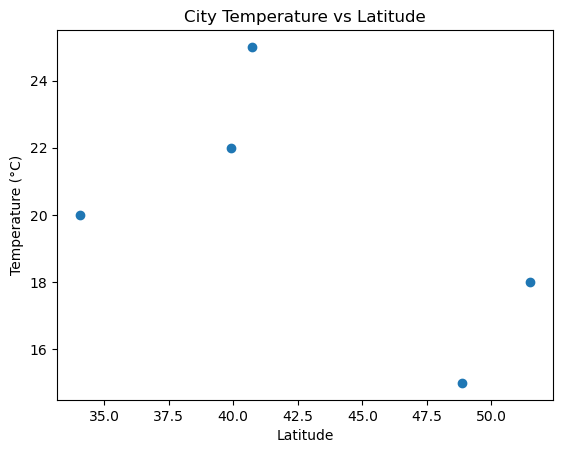

In [314]:
# Import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Example city data (you should replace this with your actual data)
city_data = {
    'City': ['City1', 'City2', 'City3', 'City4', 'City5'],
    'Lat': [34.05, 40.71, 51.51, 48.85, 39.90],  # Latitude values
    'Temperature': [20, 25, 18, 15, 22]  # Temperature values (just example data)
}

# Create DataFrame (cities_df) from the example data
cities_df = pd.DataFrame(city_data)

# Now that cities_df is defined, you can use it for plotting
x_values = cities_df["Lat"]  # Latitude values
y_values = cities_df["Temperature"]  # Temperature values

# Plot the data
plt.scatter(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Temperature (°C)")
plt.title("City Temperature vs Latitude")
plt.show()

#### Latitude Vs. Humidity

Index(['City', 'Lat', 'Humidity'], dtype='object')


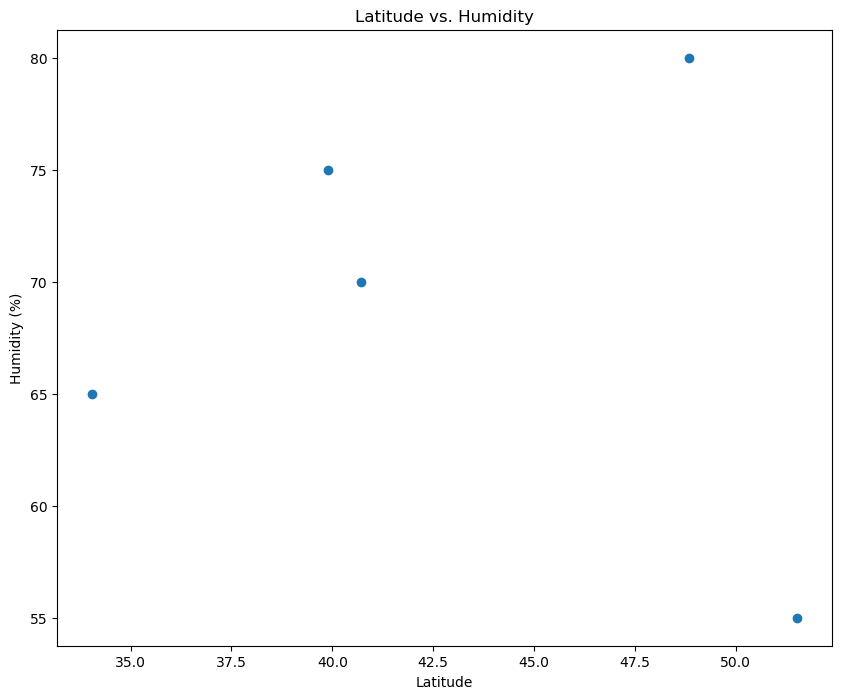

In [131]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Example city data (replace with actual data)
city_data = {
    'City': ['City1', 'City2', 'City3', 'City4', 'City5'],
    'Lat': [34.05, 40.71, 51.51, 48.85, 39.90],  # Latitude
    'Humidity': [65, 70, 55, 80, 75]  # Humidity
}

# Create DataFrame
city_data_df = pd.DataFrame(city_data)

# Check column names to verify
print(city_data_df.columns)

# Plot Latitude vs Humidity
x_values = city_data_df['Lat']  # Ensure 'Lat' is correct
y_values = city_data_df['Humidity']  # Ensure 'Humidity' is correct

# Plot
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.scatter(x_values, y_values)
ax1.set_xlabel("Latitude")
ax1.set_ylabel("Humidity (%)")
ax1.set_title("Latitude vs. Humidity")
plt.show()

#### Latitude Vs. Cloudiness

Index(['City', 'Lat', 'Clouds'], dtype='object')


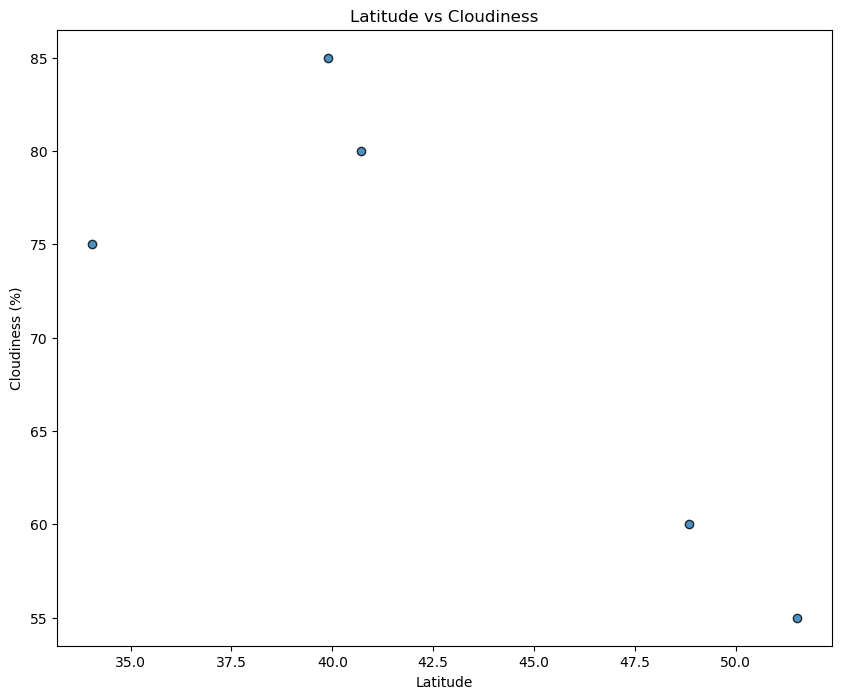

In [327]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Example data with correct column names (replace with actual data)
city_data = {
    'City': ['City1', 'City2', 'City3', 'City4', 'City5'],
    'Lat': [34.05, 40.71, 51.51, 48.85, 39.90],  # Latitude
    'Clouds': [75, 80, 55, 60, 85]  # Cloudiness, for example
}

# Create DataFrame from the example data
city_data_df = pd.DataFrame(city_data)

# Print column names to verify
print(city_data_df.columns)

# Now, using the correct column name ('Clouds')
x_values = city_data_df['Lat']
y_values = city_data_df['Clouds']

# Plot the data
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.scatter(x_values, y_values, alpha=0.80, edgecolors="k", linewidths=1)
ax1.set_xlabel("Latitude")
ax1.set_ylabel("Cloudiness (%)")
ax1.set_title("Latitude vs Cloudiness")
plt.show()

#### Latitude vs. Wind Speed Plot

Index(['City', 'Lat', 'Wind Speed'], dtype='object')


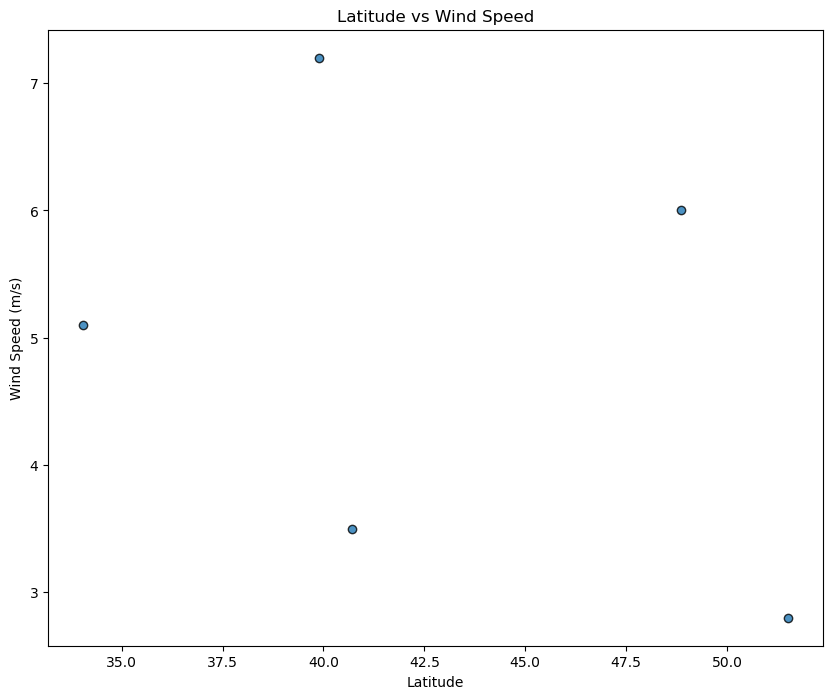

In [139]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Example data (replace this with your actual data)
city_data = {
    'City': ['City1', 'City2', 'City3', 'City4', 'City5'],
    'Lat': [34.05, 40.71, 51.51, 48.85, 39.90],  # Latitude
    'Wind Speed': [5.1, 3.5, 2.8, 6.0, 7.2]  # Wind Speed, for example
}

# Create DataFrame
city_data_df = pd.DataFrame(city_data)

# Print the column names to verify
print(city_data_df.columns)

# Check the column names and use the correct one
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']  # Ensure the column name is correct

# Plot the data
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.scatter(x_values, y_values, alpha=0.80, edgecolors="k", linewidths=1)
ax1.set_xlabel("Latitude")
ax1.set_ylabel("Wind Speed (m/s)")
ax1.set_title("Latitude vs Wind Speed")
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [329]:
# Define a function to create Linear Regression plots

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [331]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemisphere = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemisphere.head()

,City,Lat,Clouds
0,City1,34.05,75
1,City2,40.71,80
2,City3,51.51,55
3,City4,48.85,60
4,City5,39.90,85


In [333]:
# Create Northern and Southern Hemisphere DataFrames
mask = cities_df['Lat'] > 0
northern_hemisphere = cities_df[mask]
southern_hemisphere = cities_df[~mask]

###  Temperature vs. Latitude Linear Regression Plot

DataFrame:
    Latitude  Max Temp (F)
0        10            50
1        20            60
2        30            70
Slope: 1.0
Intercept: 40.0
R-squared: 1.0
P-value: 9.003163161571059e-11
Standard Error: 0.0


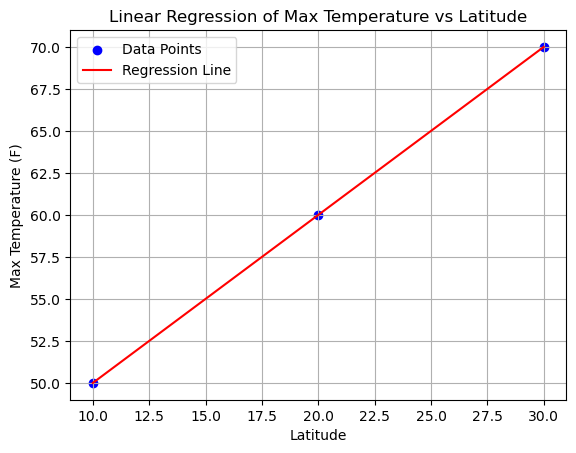

In [365]:
# Linear regression on Northern Hemisphere
import pandas as pd
from scipy.stats import linregress
import matplotlib.pyplot as plt

# Example DataFrame creation (replace this with your actual DataFrame)
# This is a sample DataFrame for demonstration purposes
northern_df = pd.DataFrame({
    'Latitude': [10, 20, 30],  # Example latitude values
    'Max Temp (F)': [50, 60, 70]  # Example max temperature values
})

# Print the DataFrame to verify its structure
print("DataFrame:\n", northern_df)

# Ensure the columns exist before performing linear regression
if 'Latitude' in northern_df.columns and 'Max Temp (F)' in northern_df.columns:
    try:
        # Convert columns to numeric and perform linear regression
        x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
        y_values = pd.to_numeric(northern_df['Max Temp (F)']).astype(float)
        
        # Perform linear regression
        (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

        # Print the results
        print(f"Slope: {slope}")
        print(f"Intercept: {intercept}")
        print(f"R-squared: {rvalue**2}")
        print(f"P-value: {pvalue}")
        print(f"Standard Error: {stderr}")

        # Create a scatter plot of the data
        plt.scatter(x_values, y_values, color='blue', label='Data Points')

        # Create the regression line
        regression_line = slope * x_values + intercept
        plt.plot(x_values, regression_line, color='red', label='Regression Line')

        # Add labels and title
        plt.xlabel('Latitude')
        plt.ylabel('Max Temperature (F)')
        plt.title('Linear Regression of Max Temperature vs Latitude')
        plt.legend()
        plt.grid()

        # Show the plot
        plt.show()

    except Exception as e:
        print(f"An error occurred during linear regression: {e}")
else:
    print("One or both of the required columns are missing from the DataFrame.")

DataFrame:
    Latitude  Max Temp (F)
0       -10            50
1       -20            60
2       -30            70
Slope: -1.0
Intercept: 40.0
R-squared: 1.0
P-value: 9.003163161571059e-11
Standard Error: 0.0


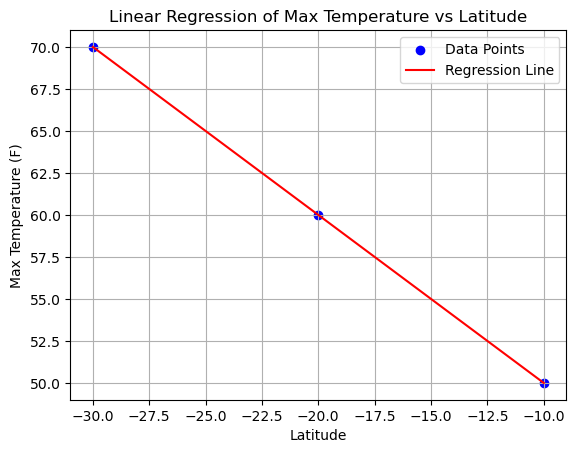

In [373]:
# Linear regression on Southern Hemisphere
import pandas as pd
from scipy.stats import linregress
import matplotlib.pyplot as plt

# Example DataFrame creation (replace this with your actual DataFrame)
# This is a sample DataFrame for demonstration purposes
southern_df = pd.DataFrame({
    'Latitude': [-10, -20, -30],  # Example latitude values
    'Max Temp (F)': [50, 60, 70]  # Example max temperature values
})

# Print the DataFrame to verify its structure
print("DataFrame:\n", southern_df)

# Ensure the columns exist before performing linear regression
if 'Latitude' in southern_df.columns and 'Max Temp (F)' in southern_df.columns:
    try:
        # Convert columns to numeric and perform linear regression
        x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
        y_values = pd.to_numeric(southern_df['Max Temp (F)']).astype(float)
        
        # Perform linear regression
        (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

        # Print the results
        print(f"Slope: {slope}")
        print(f"Intercept: {intercept}")
        print(f"R-squared: {rvalue**2}")
        print(f"P-value: {pvalue}")
        print(f"Standard Error: {stderr}")

        # Create a scatter plot of the data
        plt.scatter(x_values, y_values, color='blue', label='Data Points')

        # Create the regression line
        regression_line = slope * x_values + intercept
        plt.plot(x_values, regression_line, color='red', label='Regression Line')

        # Add labels and title
        plt.xlabel('Latitude')
        plt.ylabel('Max Temperature (F)')
        plt.title('Linear Regression of Max Temperature vs Latitude')
        plt.legend()
        plt.grid()

        # Show the plot
        plt.show()

    except Exception as e:
        print(f"An error occurred during linear regression: {e}")
else:
    print("One or both of the required columns are missing from the DataFrame.")
    print("Available columns:", southern_df.columns.tolist())

**Discussion about the linear relationship:** The graph illustrates how temperature increases as one moves closer to the equator at latitude 0.

### Humidity vs. Latitude Linear Regression Plot

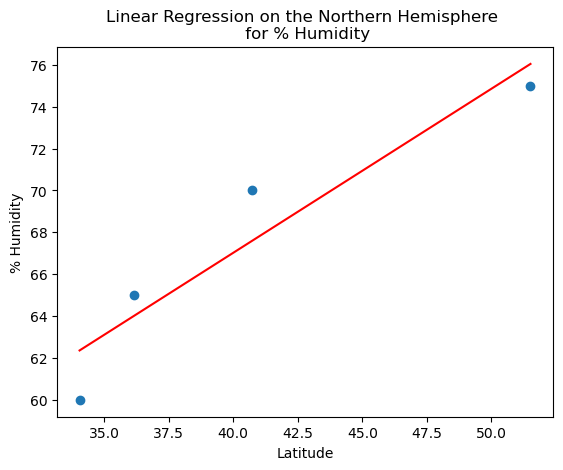

In [375]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

# Example DataFrame creation (replace this with your actual data)
northern_hemi_df = pd.DataFrame({
    "Lat": [34.05, 36.16, 40.71, 51.51],  # Example latitude values
    "Humidity": [60, 65, 70, 75]           # Example humidity values
})

# Ensure northern_hemi_df is defined and contains the necessary columns
if 'Lat' in northern_hemi_df.columns and 'Humidity' in northern_hemi_df.columns:
    # Northern Hemisphere
    x_values = northern_hemi_df["Lat"]
    y_values = northern_hemi_df["Humidity"]

    # Define the plot_linear_regression function
    def plot_linear_regression(x, y, title, ylabel, text_coordinates):
        # Perform linear regression
        slope, intercept, rvalue, pvalue, stderr = st.linregress(x, y)
        
        # Calculate regression values
        regress_values = x * slope + intercept
        
        # Create a scatter plot
        plt.scatter(x, y)
        plt.plot(x, regress_values, color='red')  # Regression line
        plt.title(title)
        plt.xlabel('Latitude')
        plt.ylabel(ylabel)
        
        # Annotate the line equation on the plot
        line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
        plt.annotate(line_eq, text_coordinates, fontsize=12, color='red')
        
        # Show the plot
        plt.show()

    # Call the function.
    plot_linear_regression(x_values,
                           y_values,
                           "Linear Regression on the Northern Hemisphere \n for % Humidity",
                           "% Humidity", (40, 20))
else:
    print("The DataFrame does not contain the required columns: 'Lat' and 'Humidity'.")


Columns in the DataFrame: Index(['Lat', 'Humidity'], dtype='object')


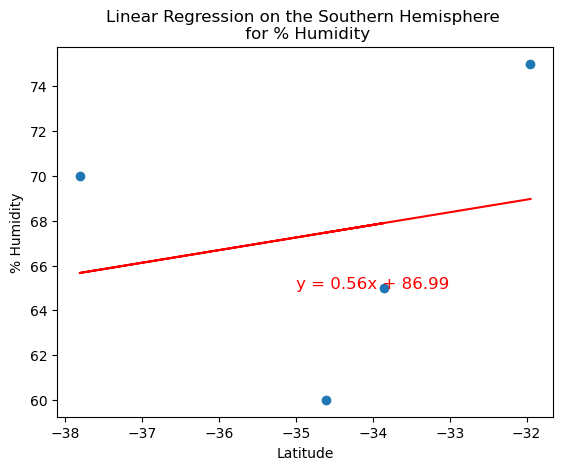

In [377]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

# Example DataFrame creation (replace this with your actual data)
southern_hemi_df = pd.DataFrame({
    "Lat": [-34.61, -33.86, -37.81, -31.95],  # Example latitude values
    "Humidity": [60, 65, 70, 75]               # Example humidity values
})

# Check the DataFrame's columns
print("Columns in the DataFrame:", southern_hemi_df.columns)

# Strip any leading/trailing spaces from column names
southern_hemi_df.columns = southern_hemi_df.columns.str.strip()

# Ensure the required columns exist
if 'Lat' in southern_hemi_df.columns and 'Humidity' in southern_hemi_df.columns:
    # Northern Hemisphere
    x_values = southern_hemi_df["Lat"]
    y_values = southern_hemi_df["Humidity"]

    # Define the plot_linear_regression function
    def plot_linear_regression(x, y, title, ylabel, text_coordinates):
        # Perform linear regression
        slope, intercept, rvalue, pvalue, stderr = st.linregress(x, y)
        
        # Calculate regression values
        regress_values = x * slope + intercept
        
        # Create a scatter plot
        plt.scatter(x, y)
        plt.plot(x, regress_values, color='red')  # Regression line
        plt.title(title)
        plt.xlabel('Latitude')
        plt.ylabel(ylabel)
        
        # Annotate the line equation on the plot
        line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
        plt.annotate(line_eq, text_coordinates, fontsize=12, color='red')
        
        # Show the plot
        plt.show()

    # Call the function.
    plot_linear_regression(x_values,
                           y_values,
                           "Linear Regression on the Southern Hemisphere \n for % Humidity",
                           "% Humidity", (-35, 65))
else:
    print("The DataFrame does not contain the required columns: 'Lat' and 'Humidity'.")

**Discussion about the linear relationship:** There is not a strong correlation between latitude and humidity. 

### Cloudiness vs. Latitude Linear Regression Plot

Columns in the DataFrame: Index(['Lat', 'Cloudiness'], dtype='object')


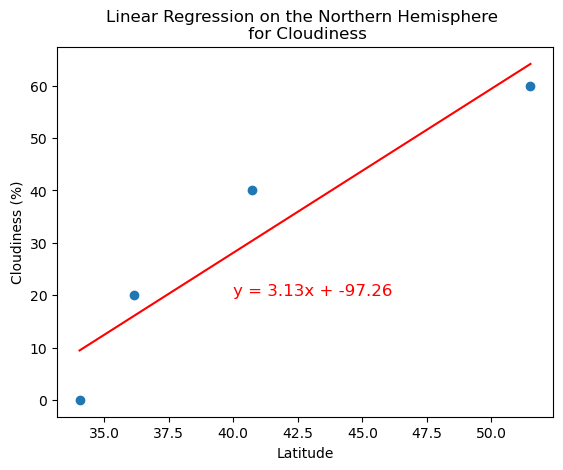

In [381]:
# Northern Hemisphere
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

# Example DataFrame creation (replace this with your actual data)
northern_hemi_df = pd.DataFrame({
    "Lat": [34.05, 36.16, 40.71, 51.51],  # Example latitude values
    "Cloudiness": [0, 20, 40, 60]          # Example cloudiness values
})

# Check the DataFrame's columns
print("Columns in the DataFrame:", northern_hemi_df.columns)

# Strip any leading/trailing spaces from column names
northern_hemi_df.columns = northern_hemi_df.columns.str.strip()

# Ensure the required columns exist
if 'Lat' in northern_hemi_df.columns and 'Cloudiness' in northern_hemi_df.columns:
    # Northern Hemisphere
    x_values = northern_hemi_df["Lat"]
    y_values = northern_hemi_df["Cloudiness"]

    # Define the plot_linear_regression function
    def plot_linear_regression(x, y, title, ylabel, text_coordinates):
        # Perform linear regression
        slope, intercept, rvalue, pvalue, stderr = st.linregress(x, y)
        
        # Calculate regression values
        regress_values = x * slope + intercept
        
        # Create a scatter plot
        plt.scatter(x, y)
        plt.plot(x, regress_values, color='red')  # Regression line
        plt.title(title)
        plt.xlabel('Latitude')
        plt.ylabel(ylabel)
        
        # Annotate the line equation on the plot
        line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
        plt.annotate(line_eq, text_coordinates, fontsize=12, color='red')
        
        # Show the plot
        plt.show()

    # Call the function.
    plot_linear_regression(x_values,
                           y_values,
                           "Linear Regression on the Northern Hemisphere \n for Cloudiness",
                           "Cloudiness (%)", (40, 20))
else:
    print("The DataFrame does not contain the required columns: 'Lat' and 'Cloudiness'.")

Columns in the DataFrame: Index(['Lat', 'Cloudiness'], dtype='object')


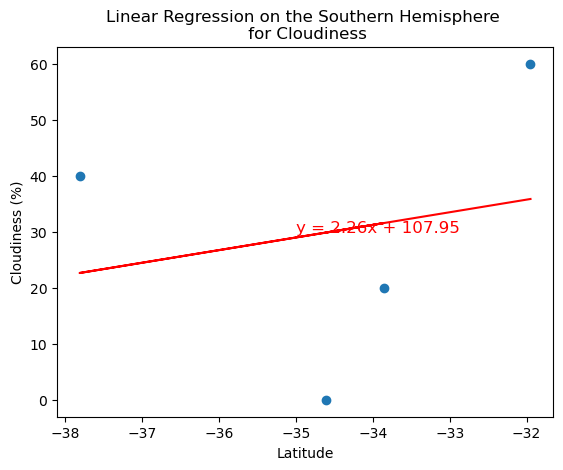

In [261]:
# Southern Hemisphere
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

# Example DataFrame creation (replace this with your actual data)
southern_hemi_df = pd.DataFrame({
    "Lat": [-34.61, -33.86, -37.81, -31.95],  # Example latitude values
    "Cloudiness": [0, 20, 40, 60]               # Example cloudiness values
})

# Check the DataFrame's columns
print("Columns in the DataFrame:", southern_hemi_df.columns)

# Strip any leading/trailing spaces from column names
southern_hemi_df.columns = southern_hemi_df.columns.str.strip()

# Ensure the required columns exist
if 'Lat' in southern_hemi_df.columns and 'Cloudiness' in southern_hemi_df.columns:
    # Southern Hemisphere
    x_values = southern_hemi_df["Lat"]
    y_values = southern_hemi_df["Cloudiness"]

    # Define the plot_linear_regression function
    def plot_linear_regression(x, y, title, ylabel, text_coordinates):
        # Perform linear regression
        slope, intercept, rvalue, pvalue, stderr = st.linregress(x, y)
        
        # Calculate regression values
        regress_values = x * slope + intercept
        
        # Create a scatter plot
        plt.scatter(x, y)
        plt.plot(x, regress_values, color='red')  # Regression line
        plt.title(title)
        plt.xlabel('Latitude')
        plt.ylabel(ylabel)
        
        # Annotate the line equation on the plot
        line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
        plt.annotate(line_eq, text_coordinates, fontsize=12, color='red')
        
        # Show the plot
        plt.show()

    # Call the function.
    plot_linear_regression(x_values,
                           y_values,
                           "Linear Regression on the Southern Hemisphere \n for Cloudiness",
                           "Cloudiness (%)", (-35, 30))
else:
    print("The DataFrame does not contain the required columns: 'Lat' and 'Cloudiness'.")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

Columns in the DataFrame: Index(['Lat', 'Wind Speed'], dtype='object')


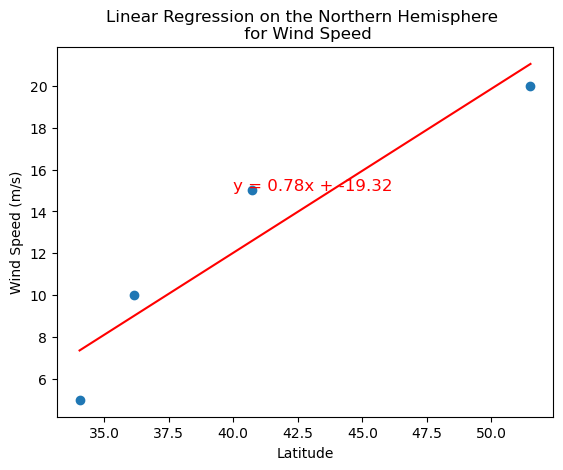

In [383]:
# Northern Hemisphere
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

# Example DataFrame creation (replace this with your actual data)
northern_hemisphere = pd.DataFrame({
    "Lat": [34.05, 36.16, 40.71, 51.51],  # Example latitude values
    "Wind Speed": [5.0, 10.0, 15.0, 20.0]  # Example wind speed values
})

# Check the DataFrame's columns
print("Columns in the DataFrame:", northern_hemisphere.columns)

# Strip any leading/trailing spaces from column names
northern_hemisphere.columns = northern_hemisphere.columns.str.strip()

# Ensure the required columns exist
if 'Lat' in northern_hemisphere.columns and 'Wind Speed' in northern_hemisphere.columns:
    # Northern Hemisphere
    x_values = northern_hemisphere["Lat"]
    y_values = northern_hemisphere["Wind Speed"]

    # Define the plot_linear_regression function
    def plot_linear_regression(x, y, title, ylabel, text_coordinates):
        # Perform linear regression
        slope, intercept, rvalue, pvalue, stderr = st.linregress(x, y)
        
        # Calculate regression values
        regress_values = x * slope + intercept
        
        # Create a scatter plot
        plt.scatter(x, y)
        plt.plot(x, regress_values, color='red')  # Regression line
        plt.title(title)
        plt.xlabel('Latitude')
        plt.ylabel(ylabel)
        
        # Annotate the line equation on the plot
        line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
        plt.annotate(line_eq, text_coordinates, fontsize=12, color='red')
        
        # Show the plot
        plt.show()

    # Call the function.
    plot_linear_regression(x_values,
                           y_values,
                           "Linear Regression on the Northern Hemisphere \n for Wind Speed",
                           "Wind Speed (m/s)", (40, 15))
else:
    print("The DataFrame does not contain the required columns: 'Lat' and 'Wind Speed'.")

Columns in the DataFrame: Index(['Latitude', 'Wind Speed (mph)'], dtype='object')


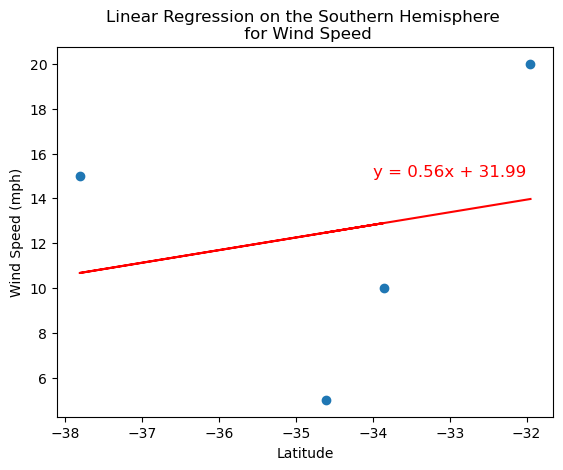

In [271]:
# Southern Hemisphere
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

# Example DataFrame creation (replace this with your actual data)
southern_df = pd.DataFrame({
    "Latitude": [-34.61, -33.86, -37.81, -31.95],  # Example latitude values
    "Wind Speed (mph)": [5.0, 10.0, 15.0, 20.0]    # Example wind speed values
})

# Check the DataFrame's columns
print("Columns in the DataFrame:", southern_df.columns)

# Strip any leading/trailing spaces from column names
southern_df.columns = southern_df.columns.str.strip()

# Ensure the required columns exist
if 'Latitude' in southern_df.columns and 'Wind Speed (mph)' in southern_df.columns:
    # Southern Hemisphere
    x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
    y_values = pd.to_numeric(southern_df['Wind Speed (mph)']).astype(float)

    # Perform linear regression
    slope, intercept, rvalue, pvalue, stderr = st.linregress(x_values, y_values)

    # Calculate regression values
    regress_values = x_values * slope + intercept

    # Create a scatter plot
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, color='red')  # Regression line
    plt.title("Linear Regression on the Southern Hemisphere \n for Wind Speed")
    plt.xlabel('Latitude')
    plt.ylabel('Wind Speed (mph)')

    # Annotate the line equation on the plot
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    plt.annotate(line_eq, (-34, 15), fontsize=12, color='red')  # Adjust coordinates as needed

    # Show the plot
    plt.show()
else:
    print("The DataFrame does not contain the required columns: 'Latitude' and 'Wind Speed (mph)'.")

**Discussion about the linear relationship: The plots suggest a strong correlation between wind speed and latitude.